In [6]:
#imports

import os
import glob
import tqdm
import random

import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from scipy.ndimage.measurements import label

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Lambda, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [10]:
#load data
vehicle_images = glob.glob('vehicles/*/*.jpeg')
non_vehicle_images = glob.glob('non-vehicles/*/*.jpeg')


In [11]:
#read images and augment
cars = []
for car_file in vehicle_images:
    car_img = mpimg.imread(car_file)
    cars.append(car_img)
    cars.append(cv2.flip(car_img,1))
    
noncars = []
for noncar_file in non_vehicle_images:
    noncar_img = mpimg.imread(noncar_file)
    noncars.append(noncar_img)

### Preprocess data

In [12]:
X = np.vstack((cars, noncars)).astype(np.float64)
y = np.hstack((np.ones(len(cars)), np.zeros(len(noncars))))

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=rand_state)

In [15]:
X.shape[1:]

(64, 64, 3)

In [86]:
model = Sequential()
model.add(Conv2D(8, 3, 3, input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(16, 3, 3, input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
#model.add(Dropout(0.6))

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))



In [87]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
generator = ImageDataGenerator( featurewise_center=True,
                                samplewise_center=False,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=False,
                                zca_whitening=False,
                                rotation_range=20.,
                                width_shift_range=0.4,
                                height_shift_range=0.4,
                                shear_range=0.2,
                                zoom_range=0.2,
                                channel_shift_range=0.1,
                                fill_mode='nearest',
                                horizontal_flip=True,
                                vertical_flip=False,
                                rescale=1.2,
                                preprocessing_function=None)

In [89]:
generator.fit(X_train)

In [90]:


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

model.fit_generator(generator.flow(X_train, y_train, batch_size=256),
                    samples_per_epoch= int(len(X_train) / 100),
                    nb_epoch=100,
                    verbose=1,
                    validation_data=(X_test, y_test))
                    

Epoch 1/100


/Users/sarvagyagupta/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


256/26 [=======================================================================================================================================================================================================================================================================================================] - 3s - loss: 1.2225 - acc: 0.4727 - val_loss: 1.3511 - val_acc: 0.4114
Epoch 2/100
256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 1.0845 - acc: 0.5391 - val_loss: 0.7290 - val_acc: 0.6341
Epoch 3/100
256/26 [========================================================================================================================================================================================================================

256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.3440 - acc: 0.8633 - val_loss: 2.1159 - val_acc: 0.6636
Epoch 24/100
256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.2883 - acc: 0.8594 - val_loss: 2.0717 - val_acc: 0.6636
Epoch 25/100
256/26 [======================================================================================================================================================================================================================

256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.1292 - acc: 0.9492 - val_loss: 1.5237 - val_acc: 0.6818
Epoch 46/100
256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.2450 - acc: 0.9062 - val_loss: 1.5322 - val_acc: 0.6830
Epoch 47/100
256/26 [======================================================================================================================================================================================================================

256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.1096 - acc: 0.9453 - val_loss: 1.1322 - val_acc: 0.6909
Epoch 68/100
256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.1273 - acc: 0.9609 - val_loss: 1.1308 - val_acc: 0.6943
Epoch 69/100
256/26 [======================================================================================================================================================================================================================

256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.1270 - acc: 0.9531 - val_loss: 0.5918 - val_acc: 0.7557
Epoch 90/100
256/26 [=======================================================================================================================================================================================================================================================================================================] - 1s - loss: 0.0809 - acc: 0.9727 - val_loss: 0.5726 - val_acc: 0.7580
Epoch 91/100
256/26 [======================================================================================================================================================================================================================

In [91]:
eval_result = model.evaluate(X_test, y_test)
print('Test accuracy:', eval_result[1])

880/880 [==============================] - 0s     
Test accuracy: 0.770454545455


In [92]:
#window sizes obtained by experimentation
window_sizes = [
                 (50,50),
                 (80,80),
                 (135,135),
                 (190,190) ]


In [93]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

#### Select the region on the image where the car is located

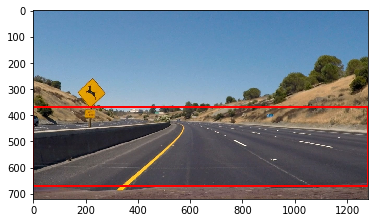

In [94]:
test_images = glob.glob('test_images/*.jpg')
img = mpimg.imread(test_images[1])
roi_up = 370
roi_down = 670
cv2.rectangle(img, (0,roi_up), (img.shape[1],roi_down) , (255,0,0), 8)
plt.imshow(img)
plt.show()

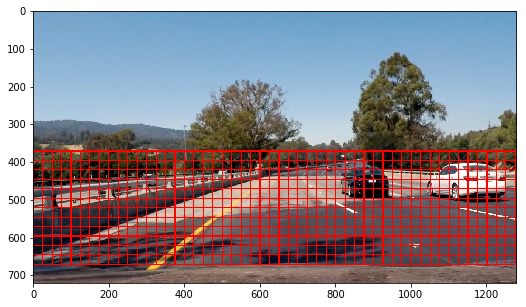

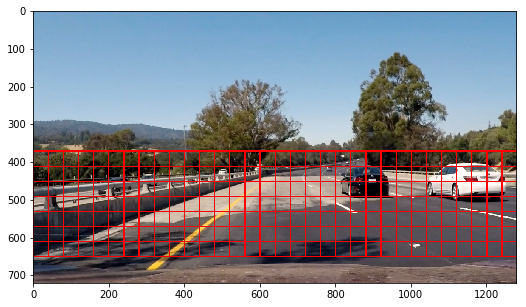

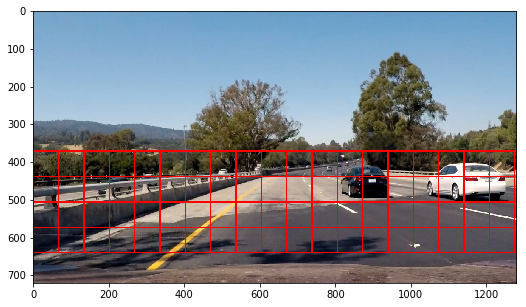

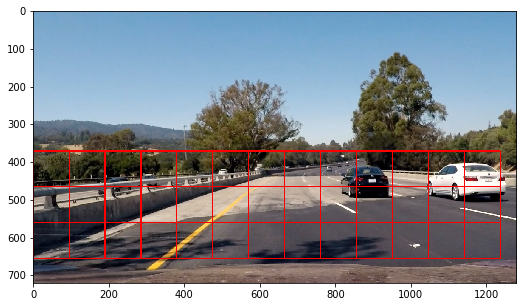

In [95]:
img = mpimg.imread(test_images[3])
for win_size in window_sizes:
    windows = slide_window(img, x_start_stop=[None, None], y_start_stop=[roi_up, roi_down], 
                        xy_window=win_size, xy_overlap=(0.5, 0.5))
    window_img = draw_boxes(img, windows, color=(255, 0, 0), thick=2)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(window_img)
    plt.show()

### overlap all windows together

814


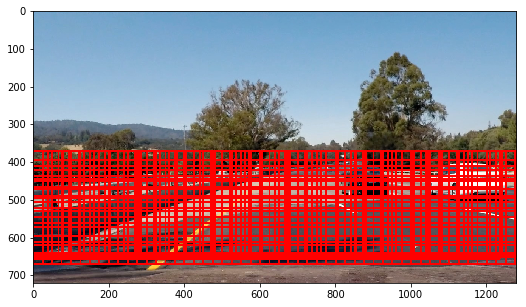

In [96]:
# Plot all together
img = mpimg.imread(test_images[3])
windows = []
for win_size in window_sizes:
    windows += slide_window(img, x_start_stop=[None, None], y_start_stop=[roi_up, roi_down], 
                        xy_window=win_size, xy_overlap=(0.5, 0.5))
print(len(windows))
window_img = draw_boxes(img, windows, color=(255, 0, 0), thick=3)
# Plot
plt.figure(figsize=(10, 5))
plt.imshow(window_img)
plt.show()

#### Search and Classify

In [170]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, model):
    #1) Create an empty list to receive positive detection windows
    #2) Iterate over all windows in the list
    test_images = []
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        # Normalize image
        test_img = test_img/255
        # Predict and round the result
        test_images.append(test_img)
    test_images = np.array(test_images)

    prediction = (model.predict(test_images))
    on_windows = [windows[i] for i in np.where(prediction>0.01457)[0]]
    return on_windows

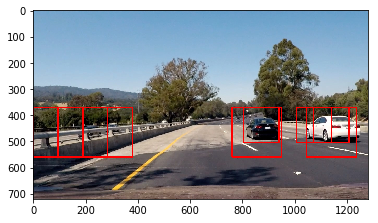

In [171]:
img = mpimg.imread(test_images[3])

detected_windows = search_windows(img, windows, model)                       

window_img = draw_boxes(img, detected_windows, color=(255, 0, 0), thick=3)                    

plt.imshow(window_img)


In [172]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
       
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,255,0), 5)
    # Return the image
    return img

In [180]:
def process(img):
    # Get model and windows list
    global last_heat_map, use_n_frames
    hot_windows = search_windows(img, windows, model)                       
    # Define heatmap
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,hot_windows)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,0.5)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    
    heatmap = heatmap.reshape(1,*heatmap.shape)
    
    
    heatmap = heatmap[0]
    
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

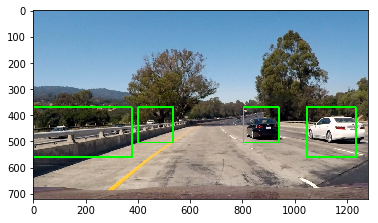

In [181]:
img = mpimg.imread('test_images/test1.jpg')
plt.imshow(process(img))

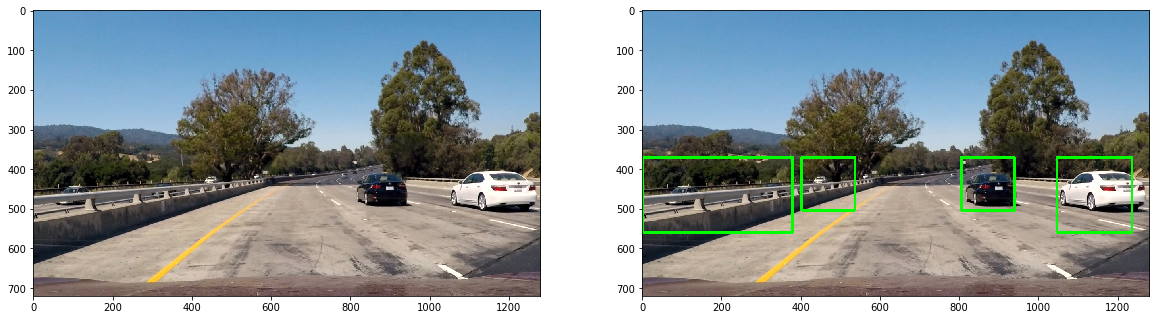

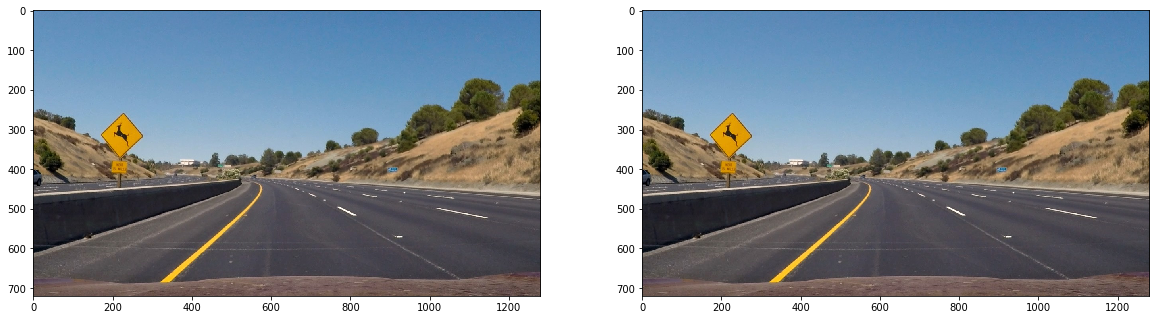

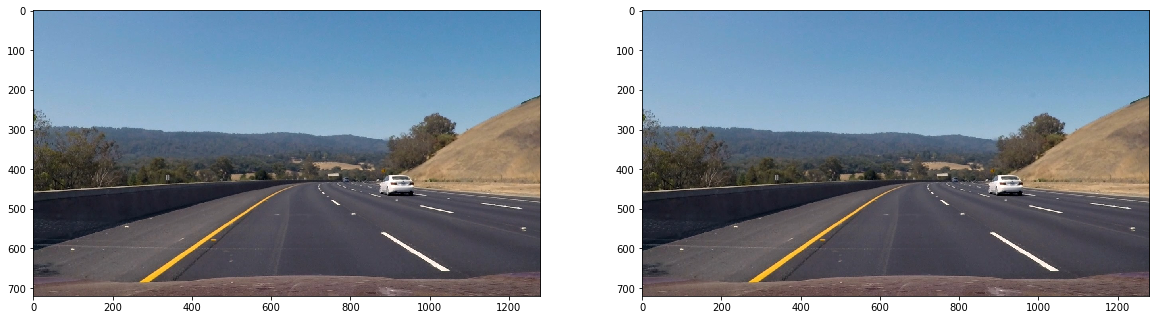

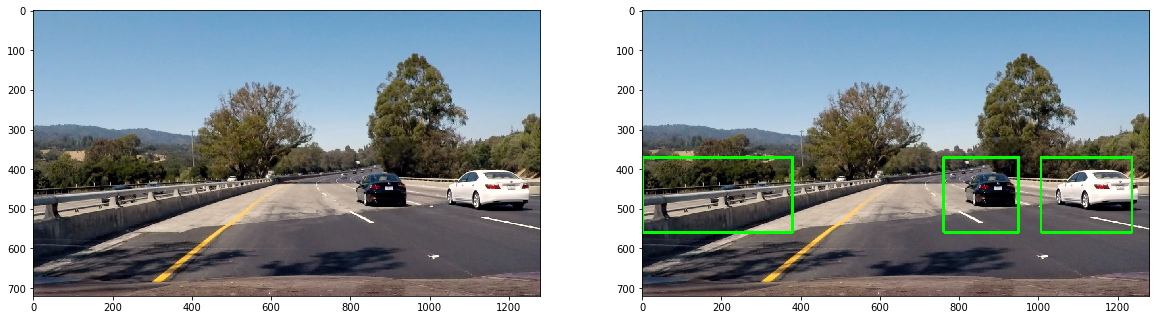

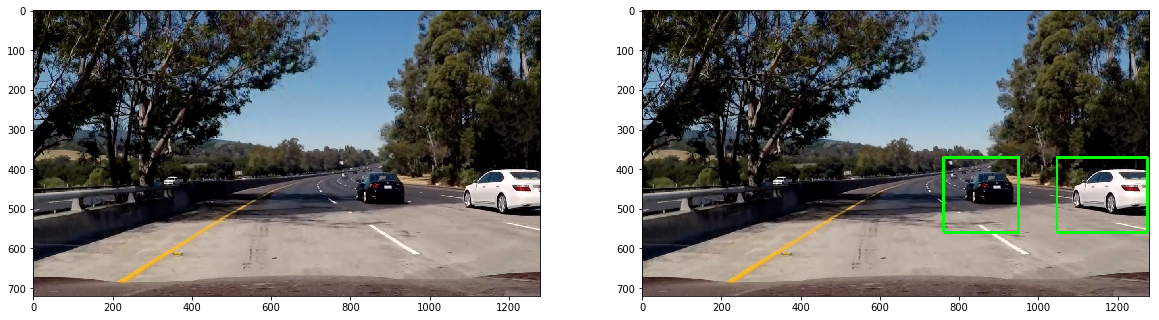

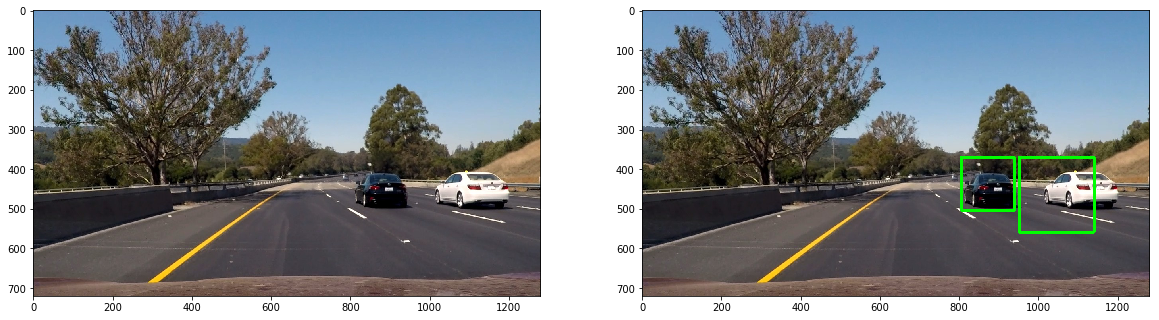

In [182]:
i = 0
for img_name in test_images:   
    img = mpimg.imread(img_name)
    result = process(img)
    global i
    # Two subplots, unpack the axes array immediately
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(img)
    ax2.imshow(result)
    name = 'result' + str(i) +'.jpg'
    i = i + 1
    cv2.imwrite('output_images/' + name, result)

In [185]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

write_output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4")
write_clip = clip1.fl_image(process) #NOTE: this function expects color images!!
%time write_clip.write_videofile(write_output, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|█████████▉| 1260/1261 [16:29<00:00,  1.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 

CPU times: user 1h 5min 41s, sys: 8min 12s, total: 1h 13min 54s
Wall time: 16min 30s


In [178]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip("project_video.mp4", 10, 20, targetname="test(10-20).mp4")


[MoviePy] Running:
>>> /Users/sarvagyagupta/Library/Application Support/imageio/ffmpeg/ffmpeg.osx -y -i project_video.mp4 -ss 10.00 -t 10.00 -vcodec copy -acodec copy test(10-20).mp4
... command successful.
